In [75]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [76]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [77]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [78]:
tensorflow.test.gpu_device_name()

'/device:GPU:0'

In [79]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/gdrive/MyDrive/GL data/Project 7/Signal.csv")

In [80]:
data.head(5)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [81]:
print('Number of examples: ', data.shape[0])
print('Number of columns: ', data.shape[1])

Number of examples:  1599
Number of columns:  12


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Split the training and test set

In [83]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

In [84]:
import matplotlib.pyplot as plt                 # Import Pyplot from matplotlib
import seaborn as sns                           # Import Seaborn library for data visualization
sns.set(color_codes = True)                     # data visualization
%matplotlib inline

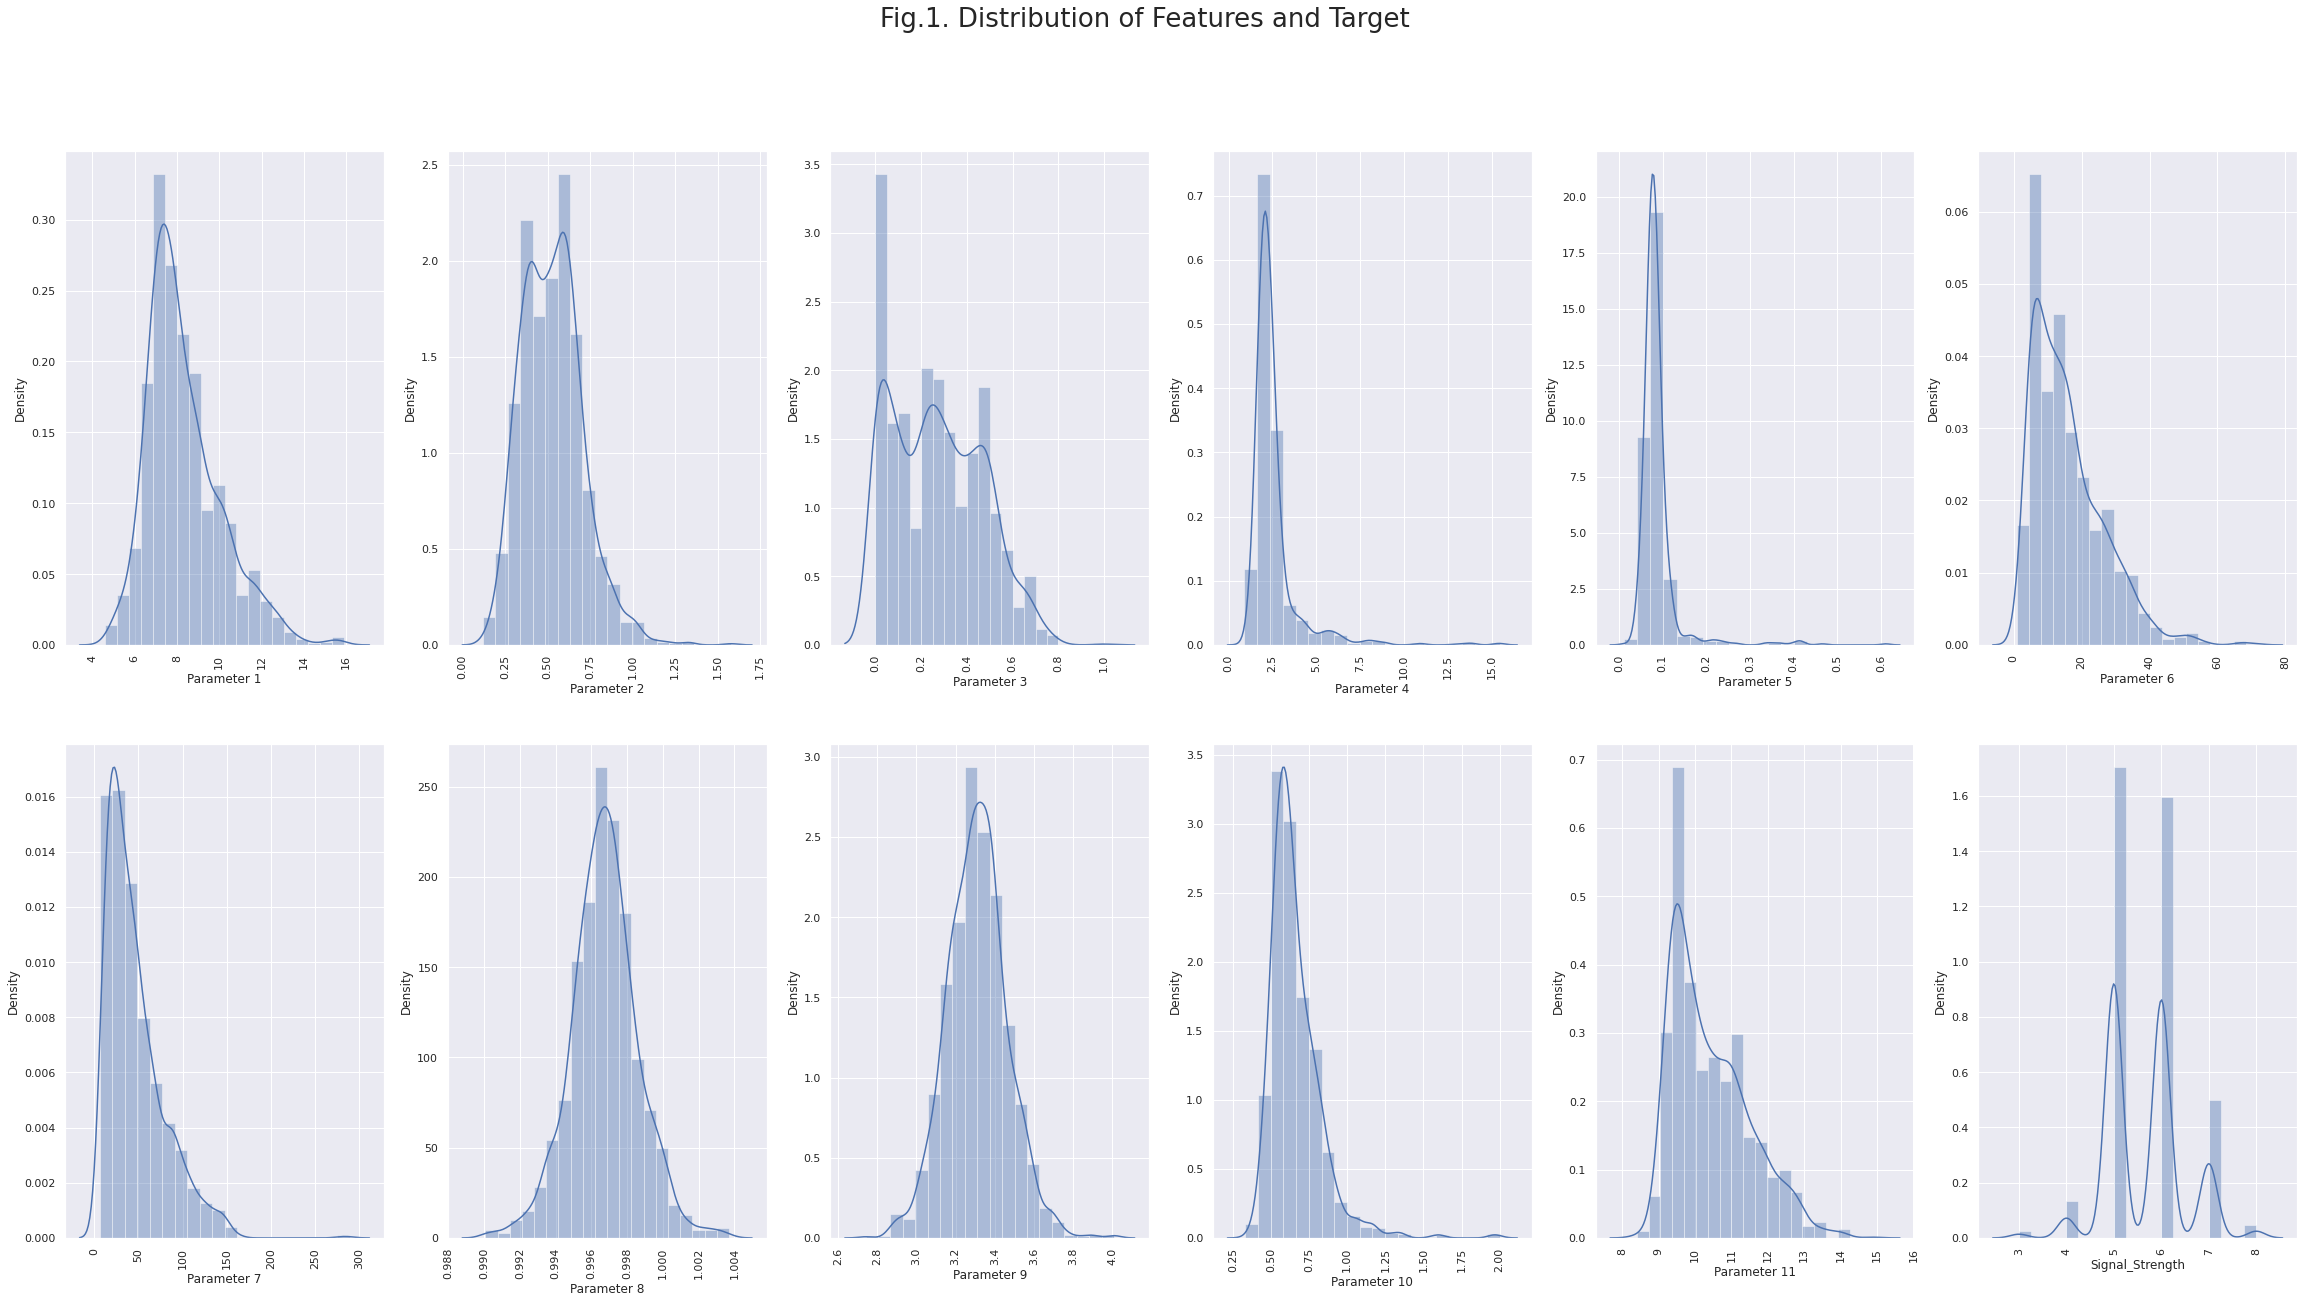

In [85]:
col = data.columns.to_list()                # creating a list of columns present in the subset 

# Plotting the distribution of each independent column in the dataframe
fig, ax = plt.subplots(2, 6, figsize=(40, 20))
fig.suptitle('Fig.1. Distribution of Features and Target', fontsize=26)
sns.set_style("whitegrid")
for variable, subplot in zip(col, ax.flatten()):
    sns.distplot(data[variable], bins = 20, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90) 

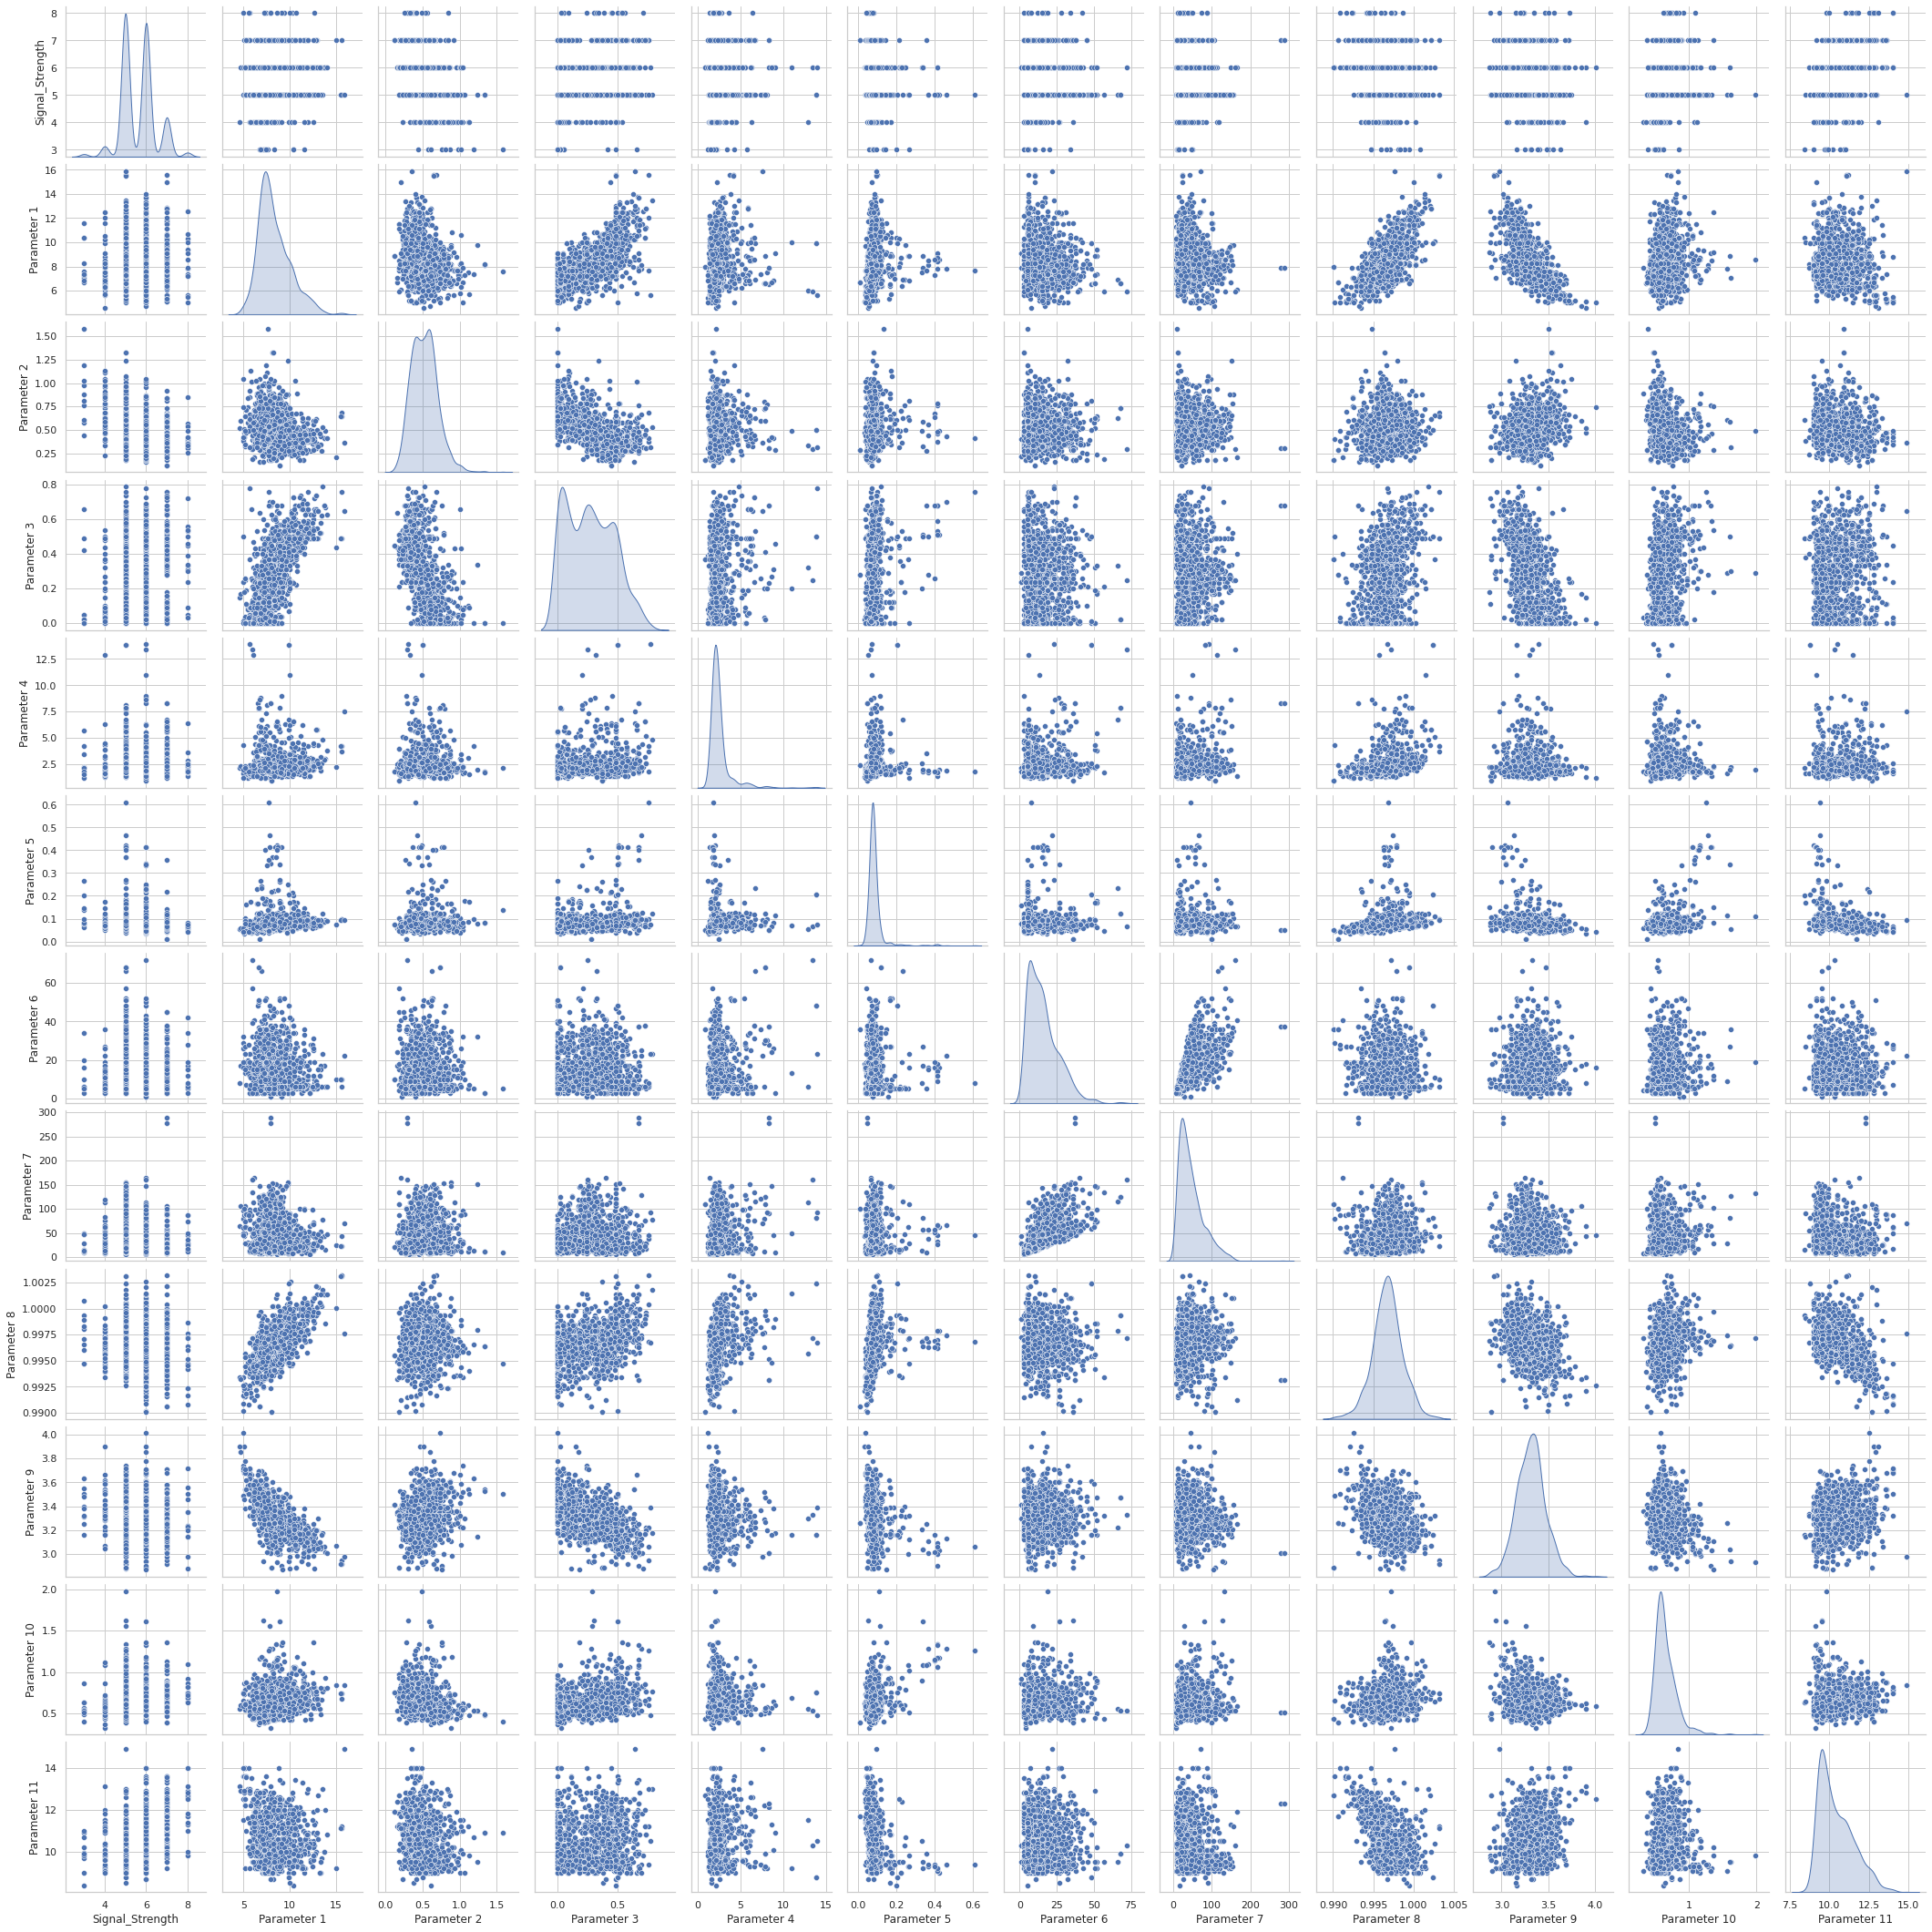

In [86]:
sns.pairplot(train_dataset[['Signal_Strength', 'Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
                            'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8', 
                            'Parameter 9', 'Parameter 10', 'Parameter 11']], diag_kind='kde')

In [87]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1279.0,8.310164,1.744190,4.60000,7.1000,7.90000,9.250000,15.9000
Parameter 2,1279.0,0.525571,0.176645,0.12000,0.3900,0.52000,0.635000,1.5800
Parameter 3,1279.0,0.271618,0.196822,0.00000,0.0900,0.26000,0.430000,0.7900
Parameter 4,1279.0,2.516341,1.300985,0.90000,1.9000,2.20000,2.600000,13.9000
Parameter 5,1279.0,0.087347,0.045666,0.01200,0.0710,0.07900,0.091000,0.6110
Parameter 6,1279.0,15.868647,10.438880,1.00000,7.0000,14.00000,21.000000,72.0000
Parameter 7,1279.0,46.488663,32.952841,6.00000,22.0000,38.00000,62.000000,289.0000
Parameter 8,1279.0,0.996739,0.001888,0.99007,0.9956,0.99676,0.997855,1.0032
Parameter 9,1279.0,3.312588,0.153923,2.87000,3.2100,3.31000,3.400000,4.0100
Parameter 10,1279.0,0.655012,0.160192,0.33000,0.5500,0.62000,0.730000,1.9800


Spilt features and targets

In [88]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Signal_Strength')
test_labels = test_features.pop('Signal_Strength')

In [89]:
train_features.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4


In [90]:
train_labels.head()

1109    6
1032    5
1002    7
487     6
979     5
Name: Signal_Strength, dtype: int64

Normalization

In [91]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [92]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Parameter 1,8.310164,1.744190
Parameter 2,0.525571,0.176645
Parameter 3,0.271618,0.196822
Parameter 4,2.516341,1.300985
Parameter 5,0.087347,0.045666
Parameter 6,15.868647,10.438880
Parameter 7,46.488663,32.952841
Parameter 8,0.996739,0.001888
Parameter 9,3.312588,0.153923
Parameter 10,0.655012,0.160192


In [93]:
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization()

In [94]:
normalizer.adapt(np.array(train_features))

In [95]:
print(normalizer.mean.numpy())

[ 8.310164    0.52557075  0.27161846  2.516341    0.08734715 15.868648
 46.488663    0.9967389   3.312588    0.6550117  10.436317  ]


In [96]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[10.8   0.47  0.43  2.1   0.17 27.   66.    1.    3.17  0.76 10.8 ]]

Normalized: [[ 1.43 -0.31  0.81 -0.32  1.83  1.07  0.59  0.77 -0.93  0.66  0.34]]


Linear Regression with one variable

In [97]:
parameter = np.array(train_features['Parameter 1'])

parameter_normalizer = preprocessing.Normalization(input_shape=[1,])
parameter_normalizer.adapt(parameter)

In [98]:
parameter_model = tf.keras.Sequential([
    parameter_normalizer,
    layers.Dense(units=1)
])

parameter_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [99]:
parameter_model.predict(parameter[:10])

array([[ 2.203402  ],
       [-0.18598655],
       [ 0.6989723 ],
       [ 1.6724265 ],
       [ 3.4423442 ],
       [-0.09749117],
       [ 0.87596387],
       [ 0.87596387],
       [ 0.43348446],
       [-1.0709459 ]], dtype=float32)

In [100]:
parameter_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [101]:
%%time
history = parameter_model.fit(
    train_features['Parameter 1'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 14.9 s, sys: 2.32 s, total: 17.2 s
Wall time: 10.7 s


In [102]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.655334,0.699652,95
96,0.664688,0.698231,96
97,0.663856,0.698227,97
98,0.661412,0.695491,98
99,0.662711,0.691702,99


In [103]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Signal_Strength]')
  plt.legend()
  plt.grid(True)

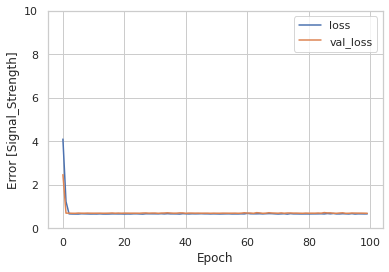

In [104]:
plot_loss(history)

In [105]:
test_results = {}

test_results['parameter_model'] = parameter_model.evaluate(
    test_features['Parameter 1'],
    test_labels, verbose=0)

In [106]:
x = tf.linspace(0.0, 20, 21)
y = parameter_model.predict(x)

In [107]:
def plot_parameter(x, y):
  plt.scatter(train_features['Parameter 1'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Parameter 1')
  plt.ylabel('Signal Strength')
  plt.legend()

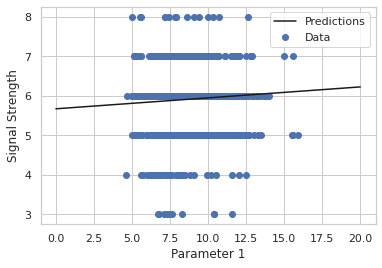

In [108]:
plot_parameter(x,y)

Multiple Input

In [109]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [110]:
linear_model.predict(train_features[:10])

array([[-1.3303081 ],
       [-0.5925715 ],
       [ 0.4181276 ],
       [ 0.12870732],
       [ 0.5875239 ],
       [-1.1970122 ],
       [-0.44051278],
       [ 1.4841802 ],
       [ 0.21872777],
       [-0.7129524 ]], dtype=float32)

In [111]:
linear_model.layers[1].kernel

<tf.Variable 'dense_19/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.20368004],
       [-0.52859026],
       [ 0.01333916],
       [-0.2305269 ],
       [-0.15555376],
       [ 0.20183605],
       [-0.51375055],
       [-0.6088325 ],
       [ 0.63739437],
       [-0.37900183],
       [-0.55844474]], dtype=float32)>

In [112]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [113]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 15 s, sys: 2.2 s, total: 17.2 s
Wall time: 10.8 s


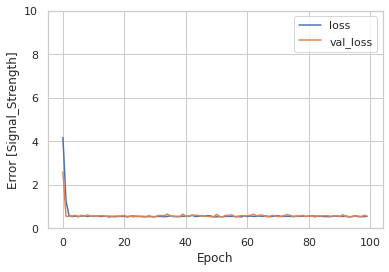

In [114]:
plot_loss(history)

In [115]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

DNN Model

In [116]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [117]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 11)                23        
_________________________________________________________________
dense_20 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 65        
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________


In [118]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 15.9 s, sys: 2.38 s, total: 18.3 s
Wall time: 11.6 s


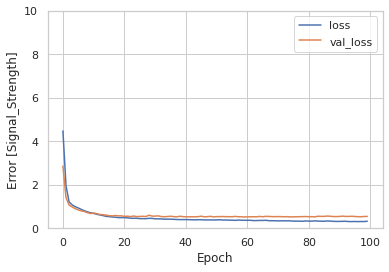

In [119]:
plot_loss(history)

In [120]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [121]:
pd.DataFrame(test_results, index=['Mean absolute error [Signal Strength]']).T

,Mean absolute error [Signal Strength]
parameter_model,0.660144
linear_model,0.505728
dnn_model,0.490859


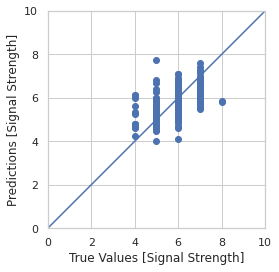

In [122]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Signal Strength]')
plt.ylabel('Predictions [Signal Strength]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

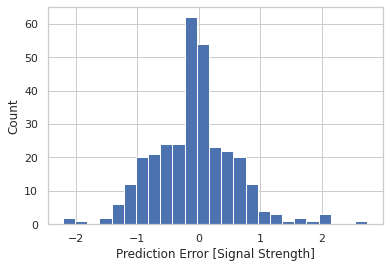

In [123]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Signal Strength]')
_ = plt.ylabel('Count')

**Fine Tuning the Network**

In [124]:
def build_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mae'])
  return model

**K-fold Cross Validation**

In [125]:
dn_model = build_and_compile_model(normalizer)

In [126]:
k=4
num_val_samples = len(train_features)//k
num_epochs = 25
all_scores = []
for i in range(k):
  print('processing fold #', i)
  X_val = train_features[i*num_val_samples: (i+1)*num_val_samples]
  y_val = train_labels[i*num_val_samples: (i+1)*num_val_samples]
  partial_X_train = np.concatenate([train_features[:i*num_val_samples], train_features[(i+1)*num_val_samples:]], axis=0)
  partial_y_train = np.concatenate([train_labels[:i*num_val_samples], train_labels[(i+1)*num_val_samples:]], axis=0)
  model = build_model(normalizer)
  model.fit(partial_X_train, partial_y_train, epochs=num_epochs, batch_size=1, verbose=1)
  val_mse, val_mae = model.evaluate(X_val, y_val, verbose=1)
  all_scores.append(val_mae)

processing fold # 0
Epoch 1/25
960/960 [==============================] - 2s 2ms/step - loss: 2.0767 - mae: 2.0767
Epoch 2/25
960/960 [==============================] - 2s 2ms/step - loss: 0.7305 - mae: 0.7305
Epoch 3/25
960/960 [==============================] - 2s 2ms/step - loss: 0.6542 - mae: 0.6542
Epoch 4/25
960/960 [==============================] - 2s 2ms/step - loss: 0.5943 - mae: 0.5943
Epoch 5/25
960/960 [==============================] - 2s 2ms/step - loss: 0.5703 - mae: 0.5703
Epoch 6/25
960/960 [==============================] - 2s 2ms/step - loss: 0.5669 - mae: 0.5669
Epoch 7/25
960/960 [==============================] - 2s 2ms/step - loss: 0.5260 - mae: 0.5260
Epoch 8/25
960/960 [==============================] - 2s 2ms/step - loss: 0.4873 - mae: 0.4873
Epoch 9/25
960/960 [==============================] - 2s 2ms/step - loss: 0.5126 - mae: 0.5126
Epoch 10/25
960/960 [==============================] - 2s 2ms/step - loss: 0.5165 - mae: 0.5165
Epoch 11/25
960/960 [========

In [127]:
all_scores

[0.4909209609031677, 0.5131029486656189, 0.541183352470398, 0.5068793892860413]

In [128]:
np.mean(all_scores)

0.5130216628313065

**Hyperparameter Tuning**

In [129]:
pip install keras-tuner

In [130]:
import kerastuner as kt

In [131]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers, optimizers

In [132]:
from kerastuner import HyperModel
class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = models.Sequential(normalizer)
        model.add(
            layers.Dense(
                units=hp.Int('units', 8, 64, 4, default=8),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=input_shape
            )
        )
        
        model.add(
            layers.Dense(
                units=hp.Int('units', 16, 64, 4, default=16),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu')
            )
        )
        
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )
        
        model.add(layers.Dense(1))

        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        
        model.compile(
            optimizer='adam',loss='mse',metrics=['mse']
        )
        
        return model

In [133]:
input_shape = (train_features.shape[1],)
hypermodel = RegressionHyperModel(input_shape)

In [134]:
import kerastuner
tuner_bo = kerastuner.tuners.bayesian.BayesianOptimization(
            hypermodel,
            objective='mse',
            max_trials=25,
            seed=42,
            executions_per_trial=2
        )
tuner_bo.search(train_features, train_labels, epochs=10, validation_split=0.2, verbose=0)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [135]:
tuner_bo.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': 8, 'conditions': [], 'min_value': 8, 'max_value': 64, 'step': 4, 'sampling': None}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
dropout (Float)
{'default': 0.005, 'conditions': [], 'min_value': 0.0, 'max_value': 0.1, 'step': 0.01, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [136]:
tuner_bo.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='mse', direction='min')
Trial summary
Hyperparameters:
units: 56
dense_activation: sigmoid
dropout: 0.0
learning_rate: 0.01
Score: 0.4357603192329407
Trial summary
Hyperparameters:
units: 48
dense_activation: sigmoid
dropout: 0.0
learning_rate: 0.0001
Score: 0.44179917871952057
Trial summary
Hyperparameters:
units: 64
dense_activation: sigmoid
dropout: 0.01
learning_rate: 0.001
Score: 0.4505964517593384
Trial summary
Hyperparameters:
units: 52
dense_activation: tanh
dropout: 0.0
learning_rate: 0.001
Score: 0.4521929919719696
Trial summary
Hyperparameters:
units: 36
dense_activation: tanh
dropout: 0.0
learning_rate: 0.0001
Score: 0.4607013463973999
Trial summary
Hyperparameters:
units: 64
dense_activation: sigmoid
dropout: 0.03
learning_rate: 0.0001
Score: 0.462822824716568
Trial summary
Hyperparameters:
units: 64
dense_activation: tanh
dropout: 0.01
learning_rate: 0.0001
Score: 0.46295012533664703
Trial

In [137]:
best_model = tuner_bo.get_best_models(num_models=1)[0]

In [138]:
loss, accuracy = best_model.evaluate(test_features, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.3602 - mse: 0.3602


**Rebuild the Best Model**

In [139]:
def build_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(56, activation='sigmoid'),
      layers.Dense(56, activation='sigmoid'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01), metrics=['mae'])
  return model

**Saving The Validation Log at Each Fold**

In [140]:
num_epochs = 100
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  X_val = train_features[i*num_val_samples: (i+1)*num_val_samples]
  y_val = train_labels[i*num_val_samples: (i+1)*num_val_samples]
  partial_X_train = np.concatenate([train_features[:i*num_val_samples], train_features[(i+1)*num_val_samples:]], axis=0)
  partial_y_train = np.concatenate([train_labels[:i*num_val_samples], train_labels[(i+1)*num_val_samples:]], axis=0)
  model = build_model(normalizer)
  history = model.fit(partial_X_train, partial_y_train, 
                      validation_data=(X_val, y_val), 
                      epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


**Build the history of successive mean K-fold Validation scores**

In [141]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)] 

**Plot validation scores**

<function matplotlib.pyplot.show>

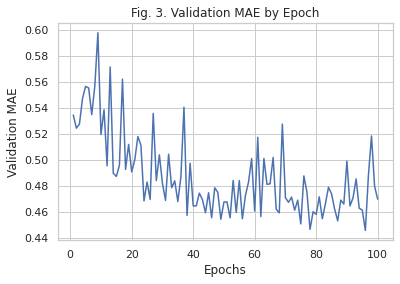

In [142]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('Fig. 3. Validation MAE by Epoch')
plt.show

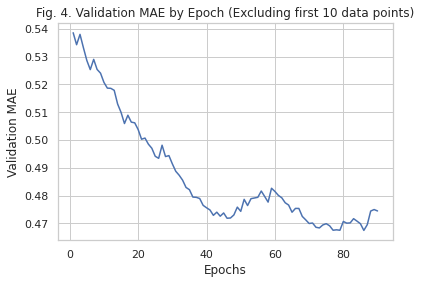

In [143]:
def smooth_curve(points, factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor + point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('Fig. 4. Validation MAE by Epoch (Excluding first 10 data points)')
plt.show()

**Training The Final Model**

In [144]:
model = build_model(normalizer)
model.fit(train_features, train_labels, epochs=78, batch_size=50, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_features, test_labels)
test_mae_score

Epoch 1/78
26/26 [==============================] - 0s 2ms/step - loss: 2.7361 - mae: 2.7361
Epoch 2/78
26/26 [==============================] - 0s 2ms/step - loss: 0.6791 - mae: 0.6791
Epoch 3/78
26/26 [==============================] - 0s 3ms/step - loss: 0.5580 - mae: 0.5580
Epoch 4/78
26/26 [==============================] - 0s 2ms/step - loss: 0.5142 - mae: 0.5142
Epoch 5/78
26/26 [==============================] - 0s 2ms/step - loss: 0.5221 - mae: 0.5221
Epoch 6/78
26/26 [==============================] - 0s 2ms/step - loss: 0.5213 - mae: 0.5213
Epoch 7/78
26/26 [==============================] - 0s 2ms/step - loss: 0.4957 - mae: 0.4957
Epoch 8/78
26/26 [==============================] - 0s 2ms/step - loss: 0.5240 - mae: 0.5240
Epoch 9/78
26/26 [==============================] - 0s 3ms/step - loss: 0.5138 - mae: 0.5138
Epoch 10/78
26/26 [==============================] - 0s 3ms/step - loss: 0.4902 - mae: 0.4902
Epoch 11/78
26/26 [==============================] - 0s 3ms/step - lo

0.4565533995628357

**Saving the Model**

In [146]:
model.save('dnn_reg_model')

INFO:tensorflow:Assets written to: dnn_reg_model/assets


In [148]:
from keras.models import load_model
new_model = load_model('dnn_reg_model')

In [149]:
test_mse_score, test_mae_score = new_model.evaluate(test_features, test_labels)
test_mae_score

10/10 [==============================] - 0s 2ms/step - loss: 0.4566 - mae: 0.4566


0.4565533995628357

**Classification Model**



Reload Data

In [185]:
data = pd.read_csv("/content/gdrive/MyDrive/GL data/Project 7/Signal.csv")
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Signal_Strength')
test_labels = test_features.pop('Signal_Strength')

Checking class imbalance

In [186]:
from collections import Counter 
Counter(train_labels)

Counter({3: 10, 4: 40, 5: 549, 6: 513, 7: 151, 8: 16})

Converting to Categories and Encoding the categories in One Hot Label form

In [187]:
encoder = LabelEncoder()
encoder.fit(train_labels)
y_train = encoder.transform(train_labels)
y_test = encoder.transform(test_labels)
y_train = tensorflow.keras.utils.to_categorical(y_train)
y_test = tensorflow.keras.utils.to_categorical(y_test)

In [188]:
X_train = train_features
X_test = test_features

Assigning weights for future weighted model comparison

In [189]:
total = len(y_train)
weight_for_0 = (1 / 10)*(total)/6.0 
weight_for_1 = (1 / 40)*(total)/6.0
weight_for_2 = (1 / 549)*(total)/6.0 
weight_for_3 = (1 / 513)*(total)/6.0
weight_for_4 = (1 / 151)*(total)/6.0 
weight_for_5 = (1 / 16)*(total)/6.0

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4, 5: weight_for_5}

Build the Network

In [190]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      normalizer,
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(6, activation='softmax',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [191]:
output_bias = tf.compat.v1.get_variable("output_bias", 6, initializer=tf.zeros_initializer())
EPOCHS = 500
BATCH_SIZE = 500

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [192]:
model = make_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 11)                23        
_________________________________________________________________
dense_30 (Dense)             (None, 16)                192       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 6)                 102       
Total params: 317
Trainable params: 294
Non-trainable params: 23
_________________________________________________________________


In [193]:
results = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6989


In [194]:
import os
import tempfile
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [195]:
X_val = X_train[:895]
partial_X_train = X_train[895:]
y_val = y_train[:895]
partial_y_train = y_train[895:]

Initializing Weights

In [196]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
zero_bias_history = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), verbose=0)

In [197]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), verbose=0)

In [198]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Evaluating the Base Model

In [199]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

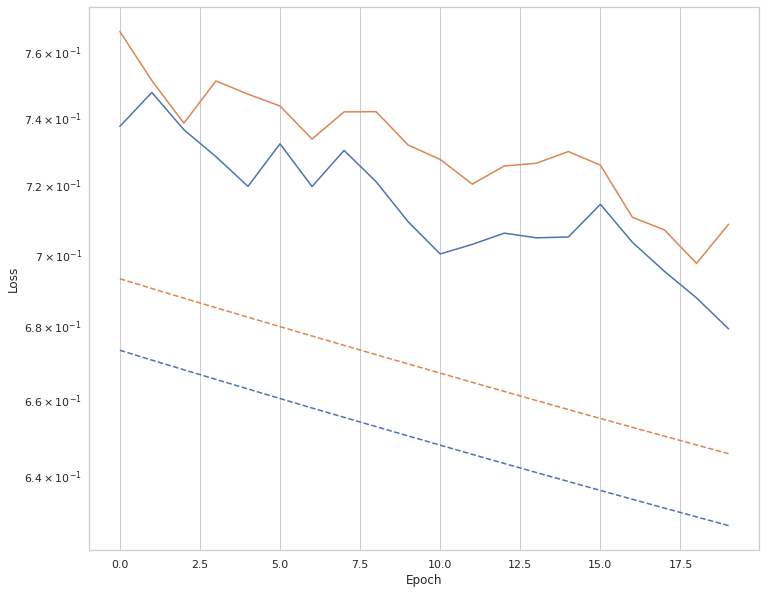

In [200]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [201]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping], validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
3/3 [==============================] - 3s 488ms/step - loss: 0.7511 - tp: 74.0000 - fp: 373.5000 - tn: 9174.0000 - fn: 1835.5000 - accuracy: 0.8076 - precision: 0.1645 - recall: 0.0380 - auc: 0.5384 - val_loss: 0.7006 - val_tp: 9.0000 - val_fp: 71.0000 - val_tn: 1529.0000 - val_fn: 311.0000 - val_accuracy: 0.8010 - val_precision: 0.1125 - val_recall: 0.0281 - val_auc: 0.5133
Epoch 2/500
3/3 [==============================] - 0s 29ms/step - loss: 0.7351 - tp: 44.7500 - fp: 272.0000 - tn: 4800.5000 - fn: 969.7500 - accuracy: 0.7953 - precision: 0.1370 - recall: 0.0429 - auc: 0.5232 - val_loss: 0.6921 - val_tp: 9.0000 - val_fp: 62.0000 - val_tn: 1538.0000 - val_fn: 311.0000 - val_accuracy: 0.8057 - val_precision: 0.1268 - val_recall: 0.0281 - val_auc: 0.5184
Epoch 3/500
3/3 [==============================] - 0s 28ms/step - loss: 0.7275 - tp: 50.0000 - fp: 256.7500 - tn: 4815.7500 - fn: 964.5000 - accuracy: 0.7986 - precision: 0.1586 - recall: 0.0483 - auc: 0.5207 - val_loss: 0

In [202]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

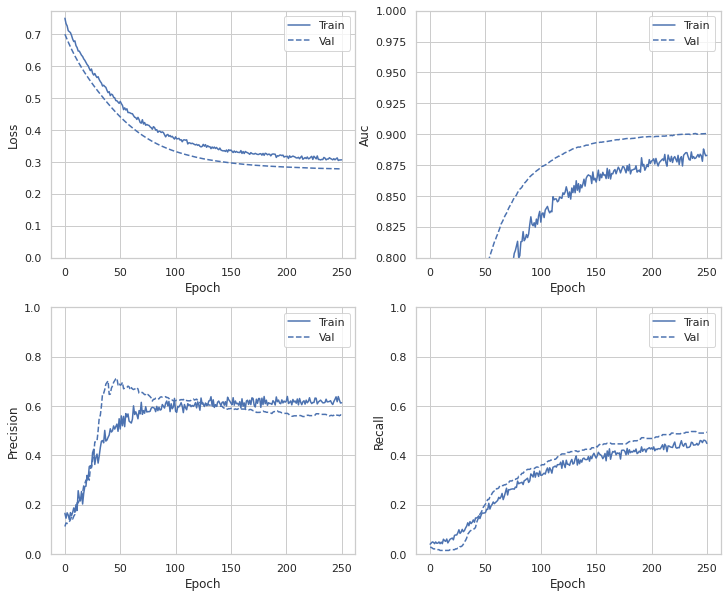

In [203]:
plot_metrics(baseline_history)

In [204]:
train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

In [205]:
baseline_results = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

loss :  0.2794031500816345
tp :  159.0
fp :  124.0
tn :  1476.0
fn :  161.0
accuracy :  0.8515625
precision :  0.5618374347686768
recall :  0.49687498807907104
auc :  0.9005849361419678



Creating Weighted Models

In [206]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)
weighted_history = weighted_model.fit(X_train, y_train, epochs=EPOCHS, 
                                      batch_size=BATCH_SIZE, 
                                      callbacks=[early_stopping], 
                                      validation_data=(X_test, y_test), 
                                      class_weight= class_weight, 
                                      verbose=1)

Epoch 1/500
3/3 [==============================] - 3s 486ms/step - loss: 0.7790 - tp: 202.7500 - fp: 383.7500 - tn: 6288.7500 - fn: 1131.7500 - accuracy: 0.8116 - precision: 0.3514 - recall: 0.1604 - auc: 0.6562 - val_loss: 0.7020 - val_tp: 9.0000 - val_fp: 71.0000 - val_tn: 1529.0000 - val_fn: 311.0000 - val_accuracy: 0.8010 - val_precision: 0.1125 - val_recall: 0.0281 - val_auc: 0.5096
Epoch 2/500
3/3 [==============================] - 0s 28ms/step - loss: 0.8099 - tp: 43.2500 - fp: 301.2500 - tn: 4771.2500 - fn: 971.2500 - accuracy: 0.7908 - precision: 0.1239 - recall: 0.0421 - auc: 0.5105 - val_loss: 0.6952 - val_tp: 9.0000 - val_fp: 66.0000 - val_tn: 1534.0000 - val_fn: 311.0000 - val_accuracy: 0.8036 - val_precision: 0.1200 - val_recall: 0.0281 - val_auc: 0.5104
Epoch 3/500
3/3 [==============================] - 0s 27ms/step - loss: 0.7982 - tp: 51.0000 - fp: 272.5000 - tn: 4800.0000 - fn: 963.5000 - accuracy: 0.7969 - precision: 0.1581 - recall: 0.0505 - auc: 0.5295 - val_loss: 

Evaluating Weighted Model

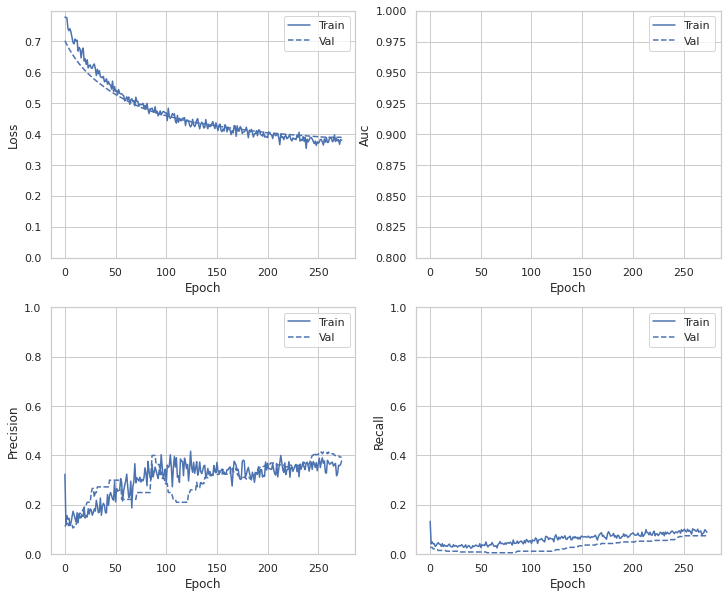

In [207]:
plot_metrics(weighted_history)

In [208]:
train_predictions_weighted = weighted_model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(X_test, batch_size=BATCH_SIZE)

Unweighted model performed better and will be saved.

In [209]:
weighted_results = weighted_model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

loss :  0.3892501890659332
tp :  24.0
fp :  35.0
tn :  1565.0
fn :  296.0
accuracy :  0.8276041746139526
precision :  0.4067796468734741
recall :  0.07500000298023224
auc :  0.7605156302452087



In [211]:
model.save('dnn_clf_model')

INFO:tensorflow:Assets written to: dnn_clf_model/assets


In [212]:
clf_model = load_model('dnn_clf_model')

In [213]:
test_predictions = clf_model.predict(X_test, batch_size=BATCH_SIZE)

In [214]:
final_results = clf_model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, final_results):
  print(name, ': ', value)
print()

loss :  0.2794031500816345
tp :  159.0
fp :  124.0
tn :  1476.0
fn :  161.0
accuracy :  0.8515625
precision :  0.5618374347686768
recall :  0.49687498807907104
auc :  0.9005849361419678



The model predicted fairly well, given the fact a naive model would have predicted only 16.67% of the values randomly since there were 6 classes.

Part 3. GUI Development with Tkinter

I have shown the code for Tkinter GUI below. But the output could not be shown as MAC OS 10.6 or higher has a serious bug which does not allow Tkinter to run. I am using MAC OS 11.2.3. Tkinter cannot also be run in Google Colab. So, running and debugging the codes were not possible.

Part 4. Image Classification

In [43]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [44]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [45]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [46]:
import numpy as np
import pandas as pd
import h5py
f = h5py.File("/content/gdrive/MyDrive/GL data/Project 7/part4.h5")

In [47]:
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [48]:
X_train = f['X_train']
y_train = f['y_train']
X_val = f['X_val']
y_val = f['y_val']
X_test = f['X_test']
y_test = f['y_test']

In [49]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(60000, 32, 32)
(60000,)
(18000, 32, 32)
(18000,)


Label: 8


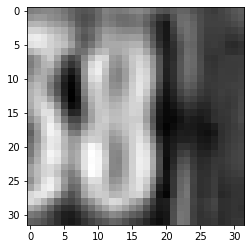

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[10000]))
plt.imshow(X_train[10000,], cmap='gray')

Reshape Features

In [52]:
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_val = X_val.reshape(60000, 1024)
print(X_val.shape)
X_test = X_test.reshape(18000, 1024)
print(X_test.shape)

(42000, 1024)
(60000, 1024)
(18000, 1024)


Normalize features

In [53]:
print(X_train.max())
print(X_train.min())

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print(X_train.max())
print(X_train.min())

254.9745
0.0
0.9999
0.0


One-hot encode the class vector

In [54]:
print(y_train[10])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train[10])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


some other images and their labels

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


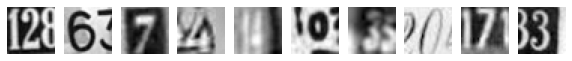

In [55]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()

Creating model 1

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)

Creating model 2

In [57]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

Check whether loss is reasonable

In [58]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

42/42 [==============================] - 0s 4ms/step - loss: 2.3480 - accuracy: 0.0948


Crank up the lambda (regularization) and check its effects on loss

In [59]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

42/42 [==============================] - 0s 4ms/step - loss: 8284.3393 - accuracy: 0.1008


Check model architecture by overfitting on small portion of data

In [60]:
X_train_subset = X_train[0:20]
y_train_subset = y_train[0:20]

In [61]:
X_train = X_train_subset
y_train = y_train_subset

In [62]:
X_train.shape

(20, 1024)

In [63]:
y_train.shape

(20, 10)

In [64]:
lr = 0.001
Lambda = 0
train_and_test_loop(500, lr, Lambda)

Epoch 1/500
1/1 [==============================] - 0s 348ms/step - loss: 2.5347 - accuracy: 0.0500
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 2.5110 - accuracy: 0.0500
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 2.4679 - accuracy: 0.0500
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 2.4115 - accuracy: 0.0500
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 2.3476 - accuracy: 0.0500
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 2.2812 - accuracy: 0.1000
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 2.2177 - accuracy: 0.1000
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 2.1589 - accuracy: 0.1000
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 2.1059 - accuracy: 0.2000
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 2.0594 - accuracy: 0.2500
Epoch 11/500
1/1 [=========

Load original dataset again

In [65]:
X_train = f['X_train']
y_train = f['y_train']
X_val = f['X_val']
y_val = f['y_val']
X_test = f['X_test']
y_test = f['y_test']

In [66]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [67]:
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_val = X_val.reshape(60000, 1024)
print(X_val.shape)
X_test = X_test.reshape(18000, 1024)
print(X_test.shape)

(42000, 1024)
(60000, 1024)
(18000, 1024)


In [68]:
print(X_train.max())
print(X_train.min())

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print(X_train.max())
print(X_train.min())

254.9745
0.0
0.9999
0.0


In [69]:
print(y_train[10])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train[10])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


Start with small regularization and find learning rate that makes the loss go down.

In [70]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
42/42 [==============================] - 1s 4ms/step - loss: 2.3942 - accuracy: 0.0968
Epoch 2/20
42/42 [==============================] - 0s 4ms/step - loss: 2.3908 - accuracy: 0.0983
Epoch 3/20
42/42 [==============================] - 0s 4ms/step - loss: 2.3928 - accuracy: 0.0990
Epoch 4/20
42/42 [==============================] - 0s 4ms/step - loss: 2.3938 - accuracy: 0.1004
Epoch 5/20
42/42 [==============================] - 0s 4ms/step - loss: 2.3929 - accuracy: 0.0975
Epoch 6/20
42/42 [==============================] - 0s 4ms/step - loss: 2.3966 - accuracy: 0.0973
Epoch 7/20
42/42 [==============================] - 0s 4ms/step - loss: 2.3913 - accuracy: 0.0979
Epoch 8/20
42/42 [==============================] - 0s 4ms/step - loss: 2.3918 - accuracy: 0.0994
Epoch 9/20
42/42 [==============================] - 0s 4ms/step - loss: 2.3958 - accuracy: 0.0976
Epoch 10/20
42/42 [==============================] - 0s 4ms/step - loss: 2.3940 - accuracy: 0.0993
Epoch 11/20
42/42 [

try a (larger) learning rate.

In [71]:
lr = 1e8
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1024
Epoch 2/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0997
Epoch 3/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 4/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0994
Epoch 5/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1017
Epoch 6/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0985
Epoch 7/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0994
Epoch 8/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1001
Epoch 9/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1006
Epoch 10/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0991
Epoch 11/20
42/42 [==============================

train now with a value of learning rate in between the two

In [72]:
lr = 1e4
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
42/42 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0994
Epoch 2/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1008
Epoch 3/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1016
Epoch 4/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1013
Epoch 5/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0979
Epoch 6/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0985
Epoch 7/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1011
Epoch 8/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1002
Epoch 9/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0992
Epoch 10/20
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0992
Epoch 11/20
42/42 [==============================

Still too high learning rate. Loss is not decreasing. The rough range of learning rate we should be cross validating is somewhere between [1e3 to 1e-7]

In [73]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
42/42 [==============================] - 0s 4ms/step - loss: 2.3239 - accuracy: 0.1029
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 2.1818 - accuracy: 0.2393
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 1.9700 - accuracy: 0.3045
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 1.9647 - accuracy: 0.3169
Epoch 5/100
42/42 [==============================] - 0s 4ms/step - loss: 1.7513 - accuracy: 0.3950
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 1.5778 - accuracy: 0.4615
Epoch 7/100
42/42 [==============================] - 0s 4ms/step - loss: 1.4347 - accuracy: 0.5157
Epoch 8/100
42/42 [==============================] - 0s 4ms/step - loss: 1.3316 - accuracy: 0.5639
Epoch 9/100
42/42 [==============================] - 0s 4ms/step - loss: 1.2321 - accuracy: 0.6052
Epoch 10/100
42/42 [==============================] - 0s 4ms/step - loss: 1.0991 - accuracy: 0.6575
Epoch 11/

run finer search

In [74]:
import math
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-3.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-7,-3))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
42/42 [==============================] - 0s 3ms/step - loss: 2.3223 - accuracy: 0.1080
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 2.1805 - accuracy: 0.2569
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 2.1048 - accuracy: 0.2781
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 1.7121 - accuracy: 0.4085
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 1.5896 - accuracy: 0.4633
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 1.4969 - accuracy: 0.5021
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 1.3179 - accuracy: 0.5664
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 1.3268 - accuracy: 0.5739
Epoch 9/100
42/42 [==============================] - 0s 4ms/step - loss: 1.2001 - accuracy: 0.6146
Epoch 10/100
42/42 [==============================] - 0s 3ms/step - loss: 1.1162 - accuracy: 0.6492
Epoch 11/

In [75]:
import math
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-3.0, -2.0))
    Lambda = math.pow(10, np.random.uniform(-7,-5))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
42/42 [==============================] - 0s 4ms/step - loss: 2.3422 - accuracy: 0.1057
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 2.2955 - accuracy: 0.1275
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 2.2880 - accuracy: 0.1444
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 2.2843 - accuracy: 0.1538
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 2.2790 - accuracy: 0.1649
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 2.2736 - accuracy: 0.1801
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 2.2682 - accuracy: 0.1994
Epoch 8/100
42/42 [==============================] - 0s 4ms/step - loss: 2.2623 - accuracy: 0.2144
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 2.2573 - accuracy: 0.2239
Epoch 10/100
42/42 [==============================] - 0s 4ms/step - loss: 2.2516 - accuracy: 0.2405
Epoch 11/

In [76]:
import math
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-2.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-7,-6))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
42/42 [==============================] - 0s 3ms/step - loss: 2.3135 - accuracy: 0.1204
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 2.1335 - accuracy: 0.2681
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 2.0011 - accuracy: 0.3002
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 1.9590 - accuracy: 0.2989
Epoch 5/100
42/42 [==============================] - 0s 4ms/step - loss: 2.0430 - accuracy: 0.2454
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 1.9037 - accuracy: 0.3053
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 1.9395 - accuracy: 0.2835
Epoch 8/100
42/42 [==============================] - 0s 4ms/step - loss: 1.8782 - accuracy: 0.3140
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 1.9386 - accuracy: 0.2908
Epoch 10/100
42/42 [==============================] - 0s 4ms/step - loss: 2.0558 - accuracy: 0.2384
Epoch 11/

In [77]:
lr = 4e-2
Lambda = 4e-7
train_and_test_loop1(100, lr, Lambda)

Epoch 1/100
42/42 [==============================] - 0s 3ms/step - loss: 2.3297 - accuracy: 0.1112
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 2.2543 - accuracy: 0.1981
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 2.0644 - accuracy: 0.3454
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 1.7109 - accuracy: 0.4456
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 1.4954 - accuracy: 0.5156
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 1.3043 - accuracy: 0.5863
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 1.2060 - accuracy: 0.6240
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 1.1031 - accuracy: 0.6606
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 1.0541 - accuracy: 0.6745
Epoch 10/100
42/42 [==============================] - 0s 3ms/step - loss: 0.9850 - accuracy: 0.6960
Epoch 11/

[0.2861745357513428, 0.9111904501914978]

In [78]:
def train_and_test_loop2(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(X_val, y_val, verbose=0)
    
    return score

In [79]:
lr = 4e-2
Lambda = 4e-7
train_and_test_loop2(100, lr, Lambda)

Epoch 1/100
42/42 [==============================] - 0s 3ms/step - loss: 2.3225 - accuracy: 0.1105
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 2.2444 - accuracy: 0.2315
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 2.0332 - accuracy: 0.3612
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 1.6731 - accuracy: 0.4671
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 1.4320 - accuracy: 0.5561
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 1.2543 - accuracy: 0.6074
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 1.1465 - accuracy: 0.6448
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 1.0724 - accuracy: 0.6747
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 1.0186 - accuracy: 0.6869
Epoch 10/100
42/42 [==============================] - 0s 4ms/step - loss: 1.0072 - accuracy: 0.6863
Epoch 11/

[0.37184908986091614, 0.8925833106040955]

In [80]:
X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))

In [81]:
iterations = 100
learning_rate = 4e-2
hidden_nodes = 256
output_nodes = 10

model = Sequential()
model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
model.add(Dense(hidden_nodes, activation='relu'))
model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
sgd = optimizers.SGD(lr=learning_rate, decay=4e-7, momentum=0.9)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
# Fit the model
model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)

Epoch 1/100
102/102 [==============================] - 1s 3ms/step - loss: 2.2731 - accuracy: 0.1561
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 1.6436 - accuracy: 0.4850
Epoch 3/100
102/102 [==============================] - 0s 3ms/step - loss: 1.2588 - accuracy: 0.6056
Epoch 4/100
102/102 [==============================] - 0s 3ms/step - loss: 1.0580 - accuracy: 0.6718
Epoch 5/100
102/102 [==============================] - 0s 3ms/step - loss: 0.9446 - accuracy: 0.7117
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.9030 - accuracy: 0.7226
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.8160 - accuracy: 0.7521
Epoch 8/100
102/102 [==============================] - 0s 3ms/step - loss: 0.7689 - accuracy: 0.7650
Epoch 9/100
102/102 [==============================] - 0s 3ms/step - loss: 0.7504 - accuracy: 0.7725
Epoch 10/100
102/102 [==============================] - 0s 3ms/step - loss: 0.7061 - accura

Model evaluation on test set

In [82]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1000, validation_data= (X_test, y_test), verbose= 1)

Epoch 1/100
102/102 [==============================] - 1s 8ms/step - loss: 0.1348 - accuracy: 0.9588 - val_loss: 0.2059 - val_accuracy: 0.9346
Epoch 2/100
102/102 [==============================] - 0s 5ms/step - loss: 0.1376 - accuracy: 0.9575 - val_loss: 0.2027 - val_accuracy: 0.9372
Epoch 3/100
102/102 [==============================] - 0s 5ms/step - loss: 0.1348 - accuracy: 0.9590 - val_loss: 0.2037 - val_accuracy: 0.9354
Epoch 4/100
102/102 [==============================] - 0s 5ms/step - loss: 0.1311 - accuracy: 0.9598 - val_loss: 0.2111 - val_accuracy: 0.9318
Epoch 5/100
102/102 [==============================] - 0s 5ms/step - loss: 0.1386 - accuracy: 0.9566 - val_loss: 0.1971 - val_accuracy: 0.9374
Epoch 6/100
102/102 [==============================] - 0s 5ms/step - loss: 0.1281 - accuracy: 0.9607 - val_loss: 0.2014 - val_accuracy: 0.9364
Epoch 7/100
102/102 [==============================] - 0s 4ms/step - loss: 0.1265 - accuracy: 0.9612 - val_loss: 0.2016 - val_accuracy: 0.9366

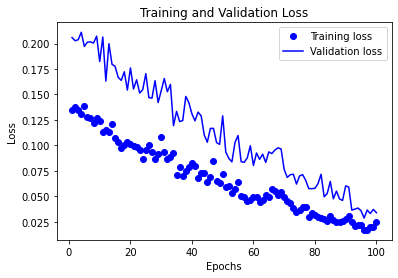

In [83]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

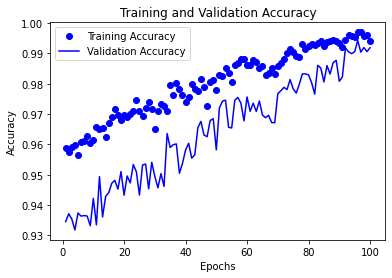

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [85]:
score = model.evaluate(X_test, y_test, verbose=0)

In [86]:
score

[0.03387591242790222, 0.9918888807296753]

In [87]:
model.save('image_clf_model')

INFO:tensorflow:Assets written to: image_clf_model/assets
